In [1]:
# 2023.11.11
# reconstructed code 

# no random init
# 1D sine function

# compute with k = 10

In [ ]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train


In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40, 80, 160, 320]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 10
    shared_params.k_period = 10

            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
  
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()

            result_matrix[i, idx, :] = [error, error_infty]

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [6]:
print(result_matrix)

[[[6.31792471e-02 5.24977565e-01]
  [5.37021160e-02 4.74938691e-01]
  [1.59234077e-01 1.00726426e+00]
  [3.60188395e-01 1.03999126e+00]
  [3.96533683e-02 7.18707383e-01]
  [2.07591742e-01 8.02594244e-01]
  [9.94445011e-02 1.11882615e+00]
  [5.93089089e-02 6.37990296e-01]
  [1.29317656e-01 1.11527884e+00]
  [1.93819314e-01 8.04684043e-01]]

 [[1.30133152e-01 6.66611850e-01]
  [1.91294283e-01 8.93325984e-01]
  [6.42293170e-02 6.24166131e-01]
  [2.66377181e-01 9.54037428e-01]
  [2.79578753e-02 4.87658322e-01]
  [2.30005383e-02 5.44154704e-01]
  [1.04608499e-01 8.09199452e-01]
  [1.79472193e-01 7.43794799e-01]
  [1.29506037e-01 8.74410868e-01]
  [2.34140418e-02 5.39616048e-01]]

 [[6.94173872e-02 4.87563372e-01]
  [1.29398936e-02 2.83084631e-01]
  [1.04633253e-02 2.52543092e-01]
  [5.29888086e-03 1.91719458e-01]
  [4.20472771e-02 4.77454424e-01]
  [6.43081032e-03 1.53280482e-01]
  [1.56814419e-02 3.71453822e-01]
  [2.60077063e-02 3.98762554e-01]
  [3.29905562e-02 4.13441181e-01]
  [2.43506

(6, 10, 2)
0.7915138320524907
<class 'numpy.ndarray'>
0.0
[0.10900282 0.08304037 0.01838504 0.00605524 0.00277359 0.00281063]
[0.79151383 0.69612876 0.31276404 0.193413   0.12183905 0.12772392]
y_min: [0.03965337 0.02300054 0.00529888 0.00066454 0.000615   0.00083527]
y_max: [0.36018839 0.26637718 0.06941739 0.02888945 0.01580894 0.0155384 ]
[[0.06934945 0.06003984 0.01308615 0.0053907  0.00215859 0.00197537]
 [0.25118558 0.18333681 0.05103235 0.02283421 0.01303535 0.01272777]]


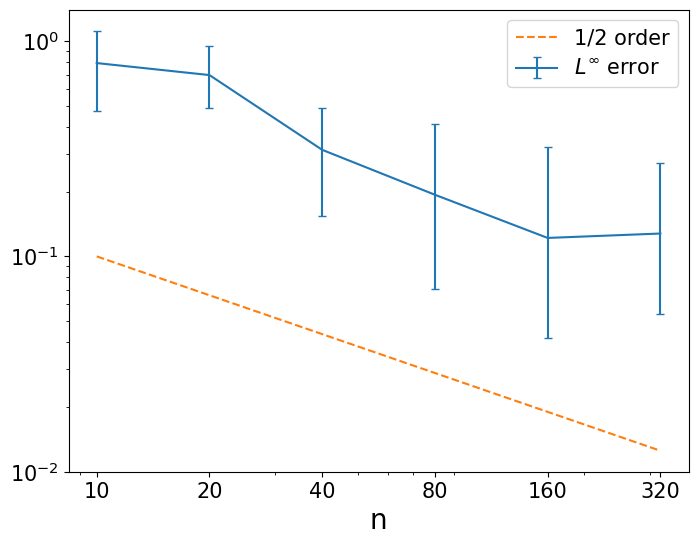

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

x_ref = [x[0], x[-1]]

y_ref = [1E-1, 1E-1/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()